In [1]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("/home/ankit-gaur/ml_project/news_fake_detection/WELFake_Dataset.csv")

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)


In [29]:
df.columns

Index(['title', 'text', 'label', 'title_length', 'text_length', 'content'], dtype='str')

In [5]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [6]:
df.shape

(72134, 4)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  72134 non-null  int64
 1   title       71576 non-null  str  
 2   text        72095 non-null  str  
 3   label       72134 non-null  int64
dtypes: int64(2), str(2)
memory usage: 2.2 MB


In [10]:
df=df.dropna()

In [11]:
df.shape

(71537, 4)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['label'].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot  as plt

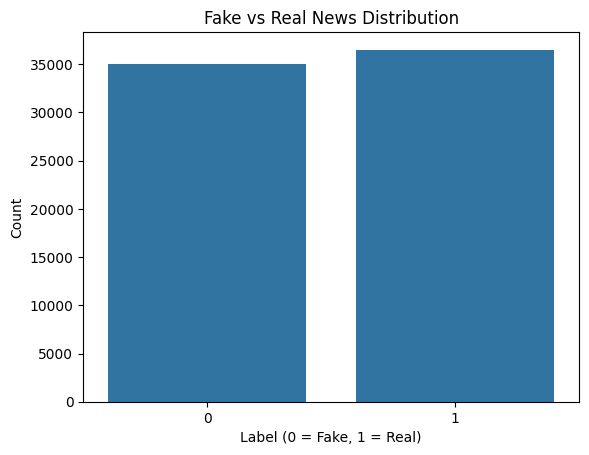

In [16]:
plt.figure()
sns.countplot(x='label', data=df)
plt.title("Fake vs Real News Distribution")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()


In [17]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='str')

In [18]:
df['title_length'] = df['title'].apply(lambda x:len(str(x)))

In [ ]:
df

,Unnamed: 0,title,text,label,title_length
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130


In [20]:
df['text_length'] = df['text'].apply(lambda x:len(str(x)))

In [21]:
df.head(1)

,Unnamed: 0,title,text,label,title_length,text_length
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,130,5049


In [22]:
df[['title_length','text_length']].describe()

,title_length,text_length
count,71537.000000,71537.000000
mean,77.128717,3292.656765
std,25.028903,3737.963633
min,1.000000,1.000000
25%,62.000000,1410.000000
50%,73.000000,2440.000000
75%,89.000000,4077.000000
max,456.000000,142961.000000


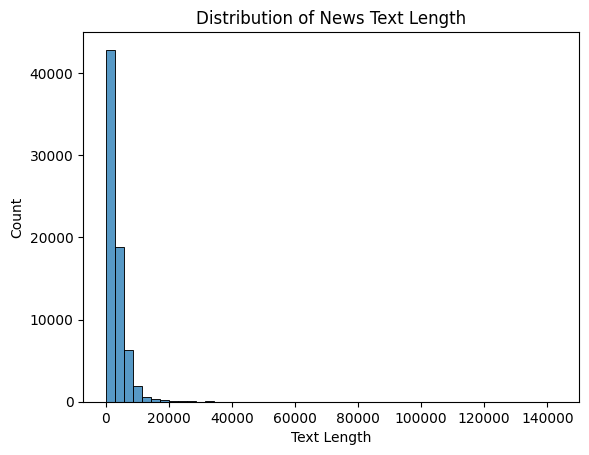

In [23]:
plt.figure()
sns.histplot(df['text_length'],bins=50)
plt.title("Distribution of News Text Length")
plt.xlabel("Text Length")
plt.show()

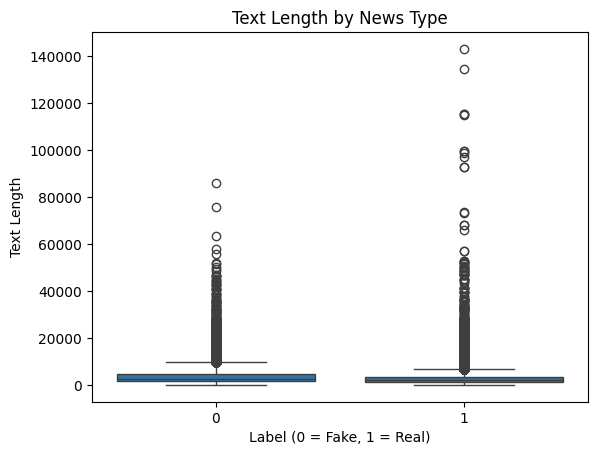

In [24]:
plt.figure()
sns.boxplot(x='label', y='text_length', data=df)
plt.title("Text Length by News Type")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Text Length")
plt.show()


In [25]:
df['content'] = df['title'] + " " + df['text']
df[['content', 'label']].head()


,content,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
5,About Time! Christian Group Sues Amazon and SP...,1


In [26]:
X = df['content']
y = df['label']

print("Input shape:", X.shape)
print("Target shape:", y.shape)


Input shape: (71537,)
Target shape: (71537,)
